In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

# Test peak fit

## Implemented peak functions

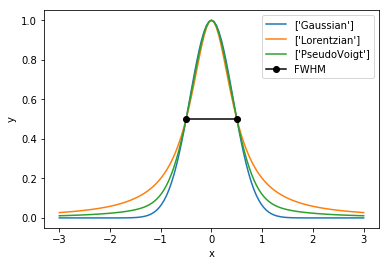

In [2]:
x = np.linspace(-3, 3, 123)

f = Gauss()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = Lorentzian()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = PseudoVoigt()
plt.plot(x, f(x, 0, 1, 1, 0.5), label=f.name);


plt.plot([-.5, .5], [.5, .5], 'o-k', label='FWHM'); # test FWHM
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Simple fit

{'function': 'Gaussian', 'x0': 0.5171472331044779, 'x0_std': 0.02029497919167394, 'fwhm': 1.0274888523104004, 'fwhm_std': 0.05003491598380297, 'amplitude': 0.9421097525876356, 'amplitude_std': 0.0384650606379947}
{'function': 'Linear', 'slope': 0.004094143973442666, 'slope_std': 0.0029627607627086714, 'intercept': 7.014388200750409, 'intercept_std': 0.009757327996325317}


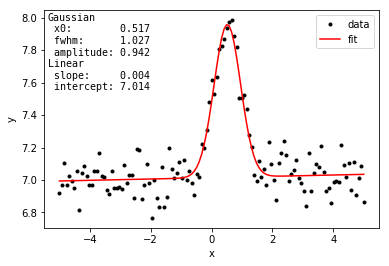

In [3]:
# Generate random data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

# _note:_ a linear slope is by default included
# set background=None to prevent this

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);

## With a linear background

{'function': 'Gaussian', 'x0': 0.4817787405712424, 'x0_std': 0.01801572470001662, 'fwhm': 0.9267096276837696, 'fwhm_std': 0.04418613501274417, 'amplitude': 1.0697883139532536, 'amplitude_std': 0.04293501175707275}
{'function': 'Linear', 'slope': 0.10195849635717576, 'slope_std': 0.0031410075695586285, 'intercept': 7.006969755405878, 'intercept_std': 0.01021363033152899}


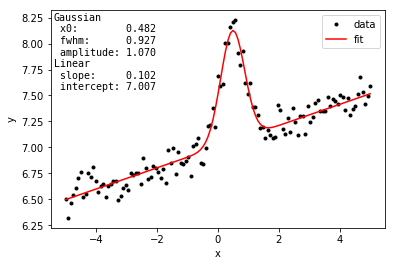

In [4]:
# Generate random data data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);

{'function': 'Gaussian', 'x0': 0.5646425749054115, 'x0_std': 0.057938671033108784, 'fwhm': 1.0375673557023335, 'fwhm_std': 0.13643514573616505, 'amplitude': 1.0524437594766372, 'amplitude_std': 0.11984520619848078}


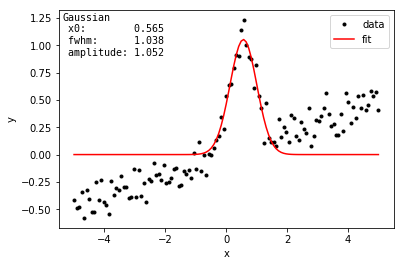

In [5]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);

## Multi-peak

{'function': 'Gaussian', 'x0': -1.5025097510229501, 'x0_std': 0.020646753420251084, 'fwhm': 1.4758629877643679, 'fwhm_std': 0.05420618806532816, 'amplitude': 0.987213667429054, 'amplitude_std': 0.028155649286951266}
{'function': 'Gaussian', 'x0': 0.5205516948195911, 'x0_std': 0.02217121507672694, 'fwhm': 1.0067324036594225, 'fwhm_std': 0.05511784098689193, 'amplitude': 0.7713288069867582, 'amplitude_std': 0.03316758715786468}
{'function': 'Linear', 'slope': 0.004389988068212099, 'slope_std': 0.0022491713444432087, 'intercept': 0.007721021401379723, 'intercept_std': 0.009464874909651328}


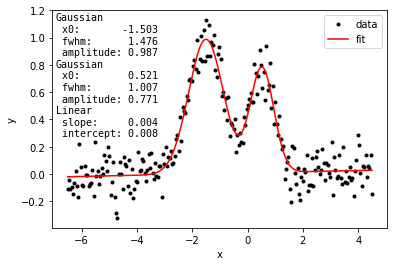

In [6]:
# Generate random data
x = np.linspace(-6.5, 4.5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plot_results(x, y, results, fit);

## Pseudo Voigt

{'function': 'PseudoVoigt', 'x0': 0.39579830862746745, 'x0_std': 0.0033648858353612916, 'fwhm': 1.0047060008866917, 'fwhm_std': 0.011100204903096628, 'amplitude': 1.0028619851913125, 'amplitude_std': 0.007285027495121934, 'eta': 0.38847783336923897, 'eta_std': 0.02853112277786988}


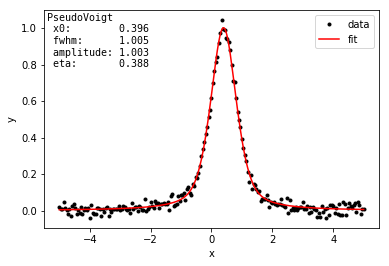

In [7]:
# Generate random data
x = np.linspace(-5, 5, 211)
y = 0.02*np.random.randn(*x.shape)
y += PseudoVoigt()(x, 0.4, 1, 1, 0.4)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, PseudoVoigt(), background=None)

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);